In [56]:
import matplotlib as mpl
import math 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [57]:
df = pd.read_csv("../Data/Expendatures Teacher Inexperience Out of Cert and Core Index").dropna()

In [58]:
df['log_PER_FED_STATE_LOCAL_EXP'] = np.log(df['PER_FED_STATE_LOCAL_EXP'])

In [ ]:
print(df)

In [59]:
features = ['PER_TEACH_INEXP', 'log_PER_FED_STATE_LOCAL_EXP', 'PER_OUT_CERT', 'ABSENT_RATE']
outcome = "CORE_INDEX"
#list(df.columns)

In [60]:
from sklearn.model_selection import train_test_split

model_df = df[features + [outcome]].copy()

df_train, df_temp = train_test_split(model_df, 
                                     train_size=0.8, 
                                     random_state=500, 
                                     shuffle=True
                                    )

# Split the remaining data into validation and test sets
df_val, df_test = train_test_split(df_temp, 
                                   train_size=0.5,  # Assuming you want half of the remaining data for validation and half for testing
                                   random_state=500, 
                                   shuffle=True
                                  )

In [61]:
X_train = df_train[features]
y_train = df_train[outcome]

X_val = df_val[features]
y_val = df_val[outcome]

X_test = df_test[features]
y_test = df_test[outcome]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Now you can use the model to make predictions on the validation or test set
# For example, on the validation set:
predictions_val = linreg.predict(X_val_scaled)

# And on the test set:
predictions_test = linreg.predict(X_test_scaled)

In [ ]:
# Assuming 'model' is your trained Linear Regression model
coefficients = linreg.coef_

# Create a DataFrame to display coefficients along with corresponding feature names
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Print or display the coefficients
print(coefficients_df)


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'model' is your trained Linear Regression model

# Make predictions on the training set
predictions_train = linreg .predict(X_train_scaled)

# Make predictions on the validation set
predictions_val = linreg .predict(X_val_scaled)

# Make predictions on the test set
predictions_test = linreg .predict(X_test_scaled)

# Calculate evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, predictions_train)

# Calculate evaluation metrics for the validation set
mae_val = mean_absolute_error(y_val, predictions_val)
mse_val = mean_squared_error(y_val, predictions_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, predictions_val)

# Calculate evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, predictions_test)

# Print the results for each set
print('Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train}')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'Root Mean Squared Error (RMSE): {rmse_train}')
print(f'R-squared (R²): {r2_train}')
print()

print('Validation Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_val}')
print(f'Mean Squared Error (MSE): {mse_val}')
print(f'Root Mean Squared Error (RMSE): {rmse_val}')
print(f'R-squared (R²): {r2_val}')
print()

print('Test Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test}')
print(f'Mean Squared Error (MSE): {mse_test}')
print(f'Root Mean Squared Error (RMSE): {rmse_test}')
print(f'R-squared (R²): {r2_test}')


Training Set Metrics:
Mean Absolute Error (MAE): 25.78145179814988
Mean Squared Error (MSE): 1015.4462005250257
Root Mean Squared Error (RMSE): 31.866066599519712
R-squared (R²): 0.3360634071300681

Validation Set Metrics:
Mean Absolute Error (MAE): 25.268170653082873
Mean Squared Error (MSE): 982.4431701470572
Root Mean Squared Error (RMSE): 31.34394949822146
R-squared (R²): 0.3815194390765989

Test Set Metrics:
Mean Absolute Error (MAE): 26.493757611756518
Mean Squared Error (MSE): 1061.6146046476345
Root Mean Squared Error (RMSE): 32.582427850723995
R-squared (R²): 0.36079353626997124


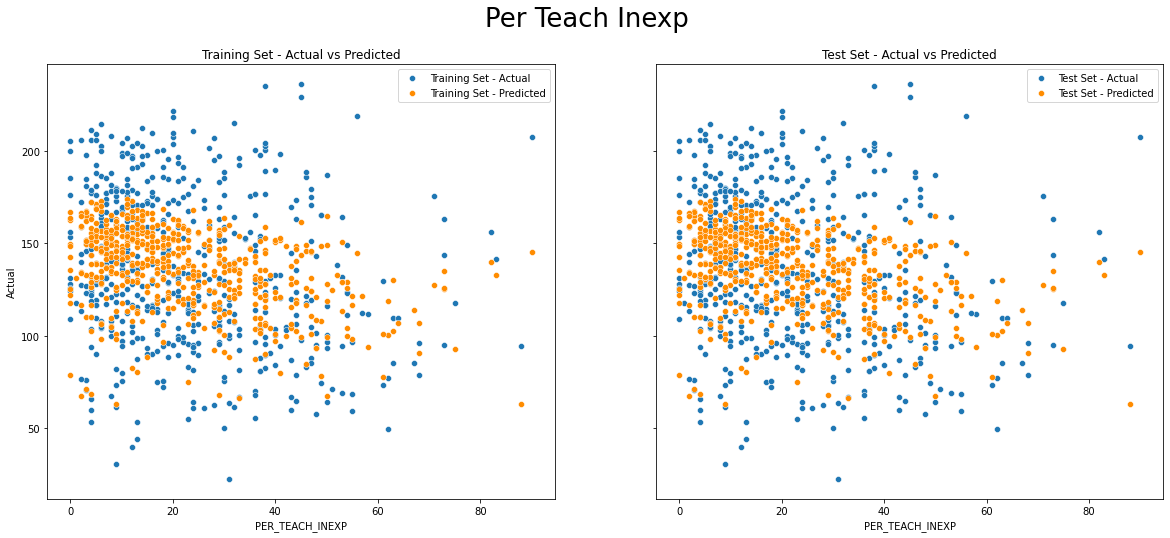

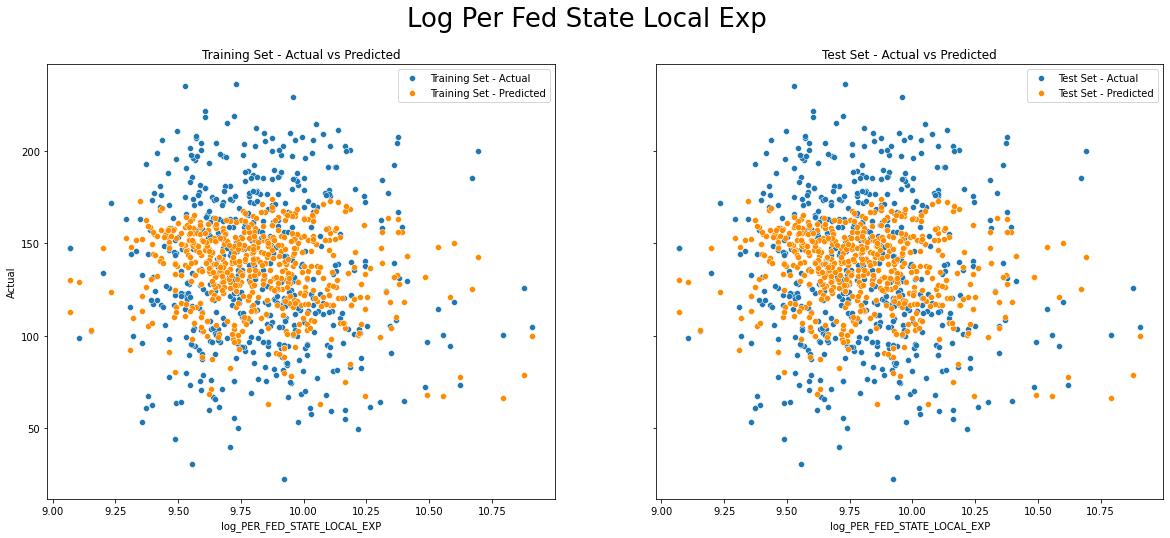

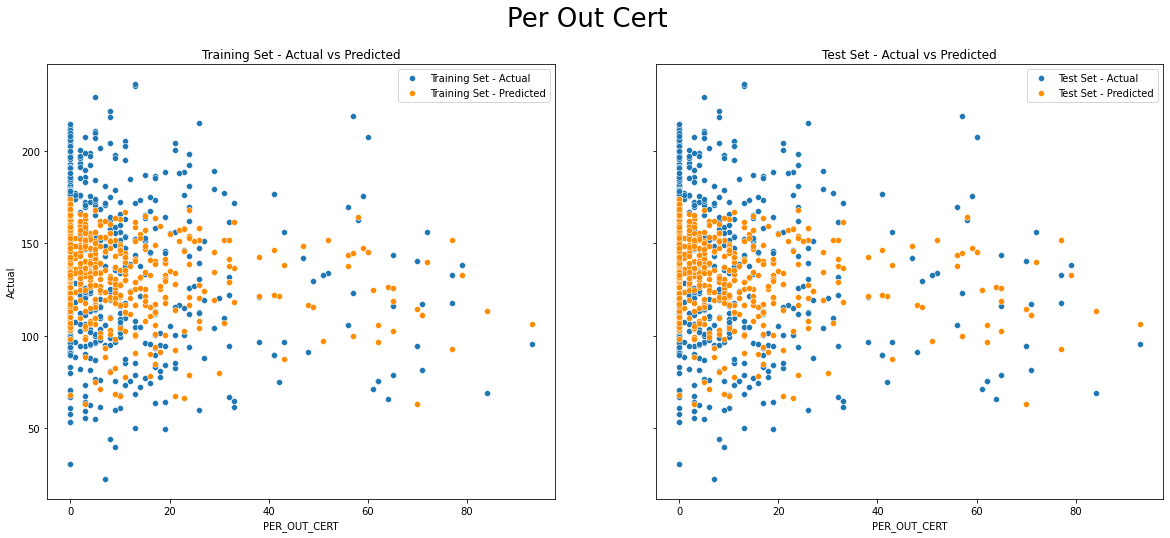

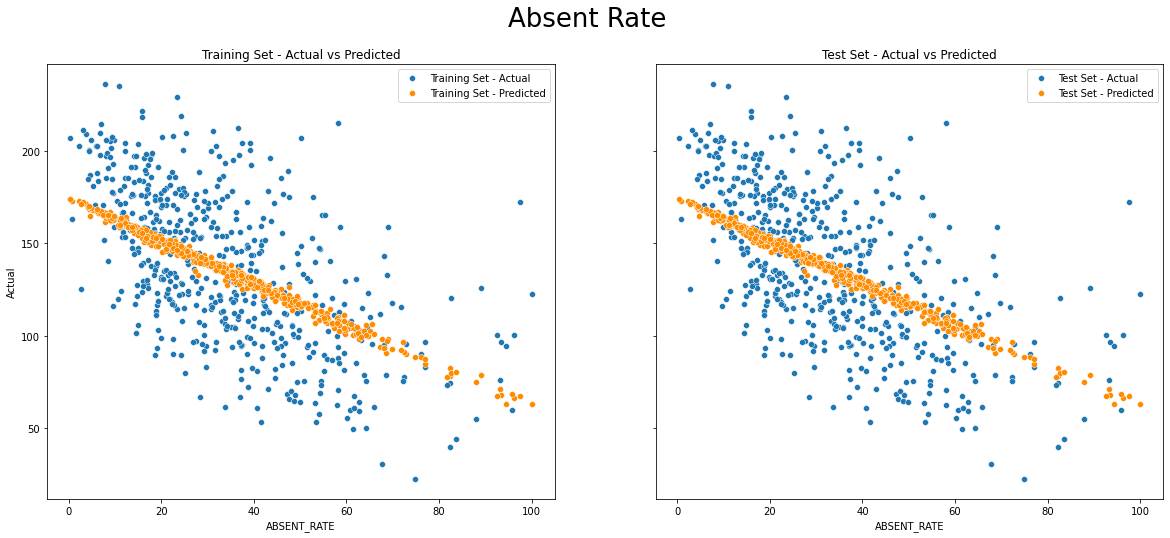

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def clean_label(label):
    return label.replace("_", " ").title()

# Assuming df_test is your test dataset
predictions_test = linreg.predict(X_test_scaled)

# Create a DataFrame with actual and predicted values for the test set
scatter_df_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions_test,
    'log_PER_FED_STATE_LOCAL_EXP': df_test['log_PER_FED_STATE_LOCAL_EXP'],
    'PER_TEACH_INEXP': df_test['PER_TEACH_INEXP'],
    'PER_OUT_CERT': df_test['PER_OUT_CERT'],
    'CORE_INDEX': df_test['CORE_INDEX'], 
    'ABSENT_RATE': df_test['ABSENT_RATE']
})

# Compare predictions on the training set and the test set
for feature in features:
    figure, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    figure.suptitle(clean_label(feature), fontsize=26)

    # Scatter plot for training set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Training Set - Actual', ax=axes[0])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Training Set - Predicted', ax=axes[0], color="darkorange")

    # Scatter plot for test set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Test Set - Actual', ax=axes[1])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Test Set - Predicted', ax=axes[1], color="darkorange")

    axes[0].set_title("Training Set - Actual vs Predicted")
    axes[1].set_title("Test Set - Actual vs Predicted")

    plt.show()


#### So far, the R-squared looks below 0.5, and scatter plots do not present a clear linear relationship. Thus, we try polynomial regression.

In [64]:
# X_train = df_train[features]
# y_train = df_train[outcome]

# X_val = df_val[features]
# y_val = df_val[outcome]

# X_test = df_test[features]
# y_test = df_test[outcome]

# # Normalize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)

# Create a polynomial regression model (degree = 2, you can change it)
degree = 4
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
polyreg.fit(X_train_scaled, y_train)

# Make predictions on the training set
predictions_poly = polyreg.predict(X_train_scaled)


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the training set
predictions_train = polyreg.predict(X_train_scaled)

# Make predictions on the validation set
predictions_val = polyreg.predict(X_val_scaled)

# Make predictions on the test set
predictions_test = polyreg.predict(X_test_scaled)

# Calculate evaluation metrics for the training set
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, predictions_train)

# Calculate evaluation metrics for the validation set
mae_val = mean_absolute_error(y_val, predictions_val)
mse_val = mean_squared_error(y_val, predictions_val)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, predictions_val)

# Calculate evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, predictions_test)

# Print the results for each set
print('Training Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_train}')
print(f'Mean Squared Error (MSE): {mse_train}')
print(f'Root Mean Squared Error (RMSE): {rmse_train}')
print(f'R-squared (R²): {r2_train}')
print()

print('Validation Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_val}')
print(f'Mean Squared Error (MSE): {mse_val}')
print(f'Root Mean Squared Error (RMSE): {rmse_val}')
print(f'R-squared (R²): {r2_val}')
print()

print('Test Set Metrics:')
print(f'Mean Absolute Error (MAE): {mae_test}')
print(f'Mean Squared Error (MSE): {mse_test}')
print(f'Root Mean Squared Error (RMSE): {rmse_test}')
print(f'R-squared (R²): {r2_test}')


Training Set Metrics:
Mean Absolute Error (MAE): 23.614132069194092
Mean Squared Error (MSE): 875.9046136504735
Root Mean Squared Error (RMSE): 29.595685726985167
R-squared (R²): 0.4273009002688004

Validation Set Metrics:
Mean Absolute Error (MAE): 23.81510580324338
Mean Squared Error (MSE): 939.494179150774
Root Mean Squared Error (RMSE): 30.65116929500038
R-squared (R²): 0.4085572534251879

Test Set Metrics:
Mean Absolute Error (MAE): 24.91998011986822
Mean Squared Error (MSE): 971.8719271656711
Root Mean Squared Error (RMSE): 31.174860499538262
R-squared (R²): 0.4148283048835306


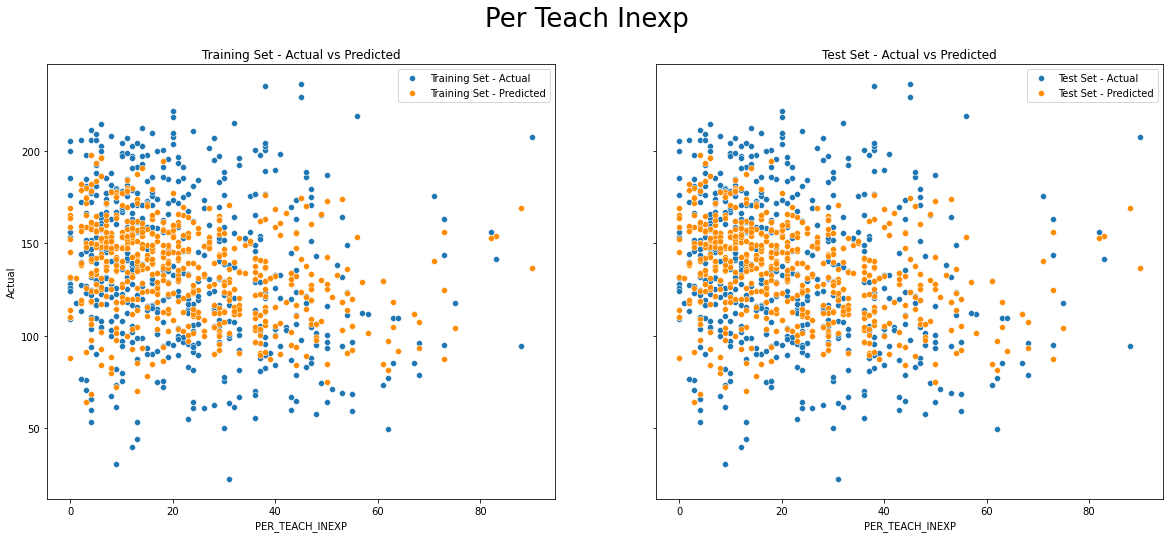

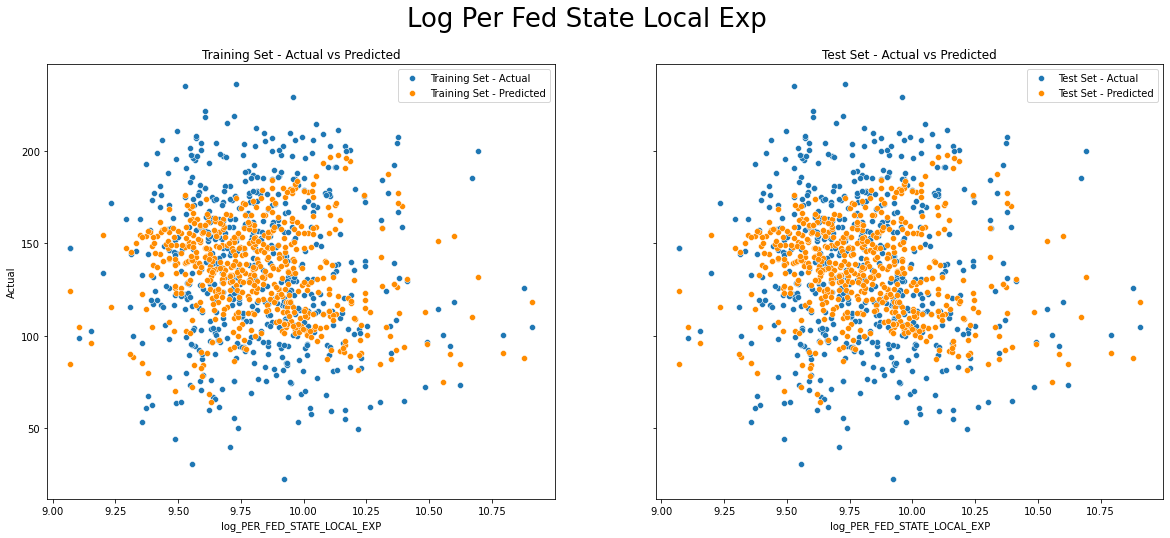

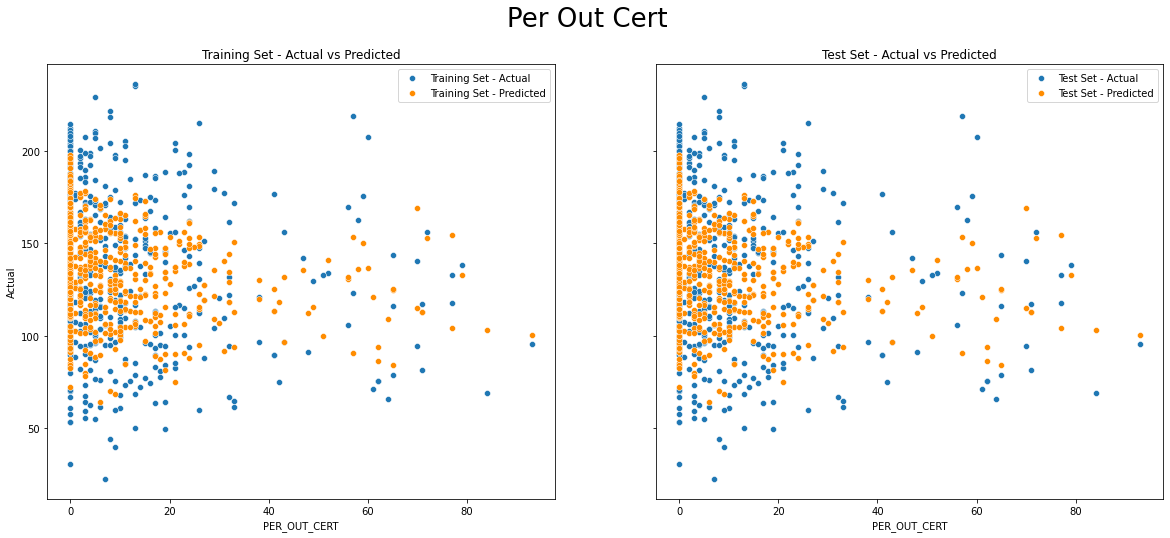

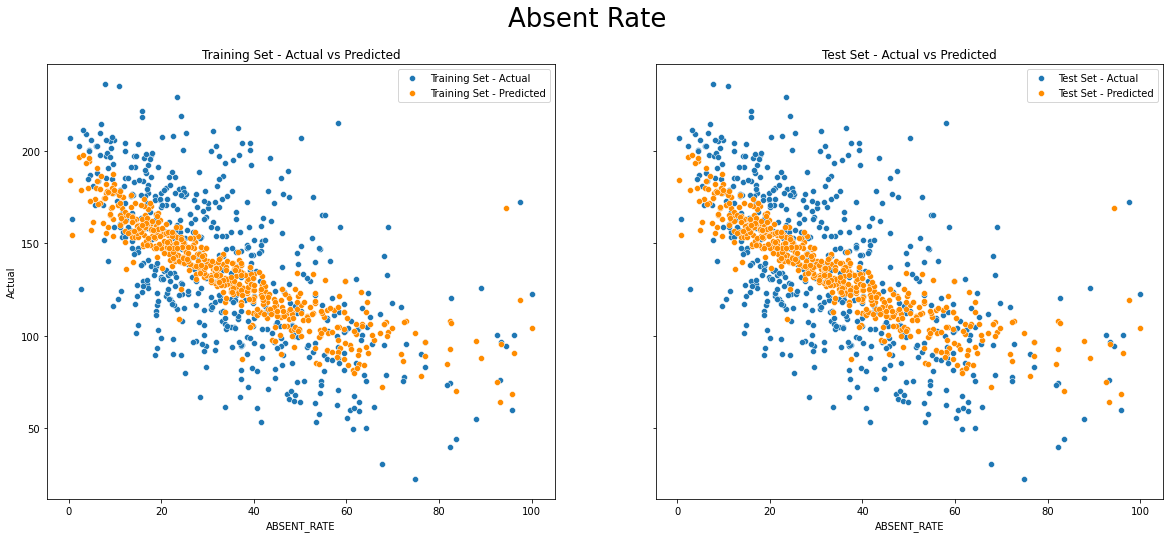

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def clean_label(label):
    return label.replace("_", " ").title()

# Assuming df_test is your test dataset
predictions_test = polyreg.predict(X_test_scaled)

# Create a DataFrame with actual and predicted values for the test set
scatter_df_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions_test,
    'log_PER_FED_STATE_LOCAL_EXP': df_test['log_PER_FED_STATE_LOCAL_EXP'],
    'PER_TEACH_INEXP': df_test['PER_TEACH_INEXP'],
    'PER_OUT_CERT': df_test['PER_OUT_CERT'],
    'CORE_INDEX': df_test['CORE_INDEX'], 
    'ABSENT_RATE': df_test['ABSENT_RATE']
})

# Compare predictions on the training set and the test set
for feature in features:
    figure, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    figure.suptitle(clean_label(feature), fontsize=26)

    # Scatter plot for training set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Training Set - Actual', ax=axes[0])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Training Set - Predicted', ax=axes[0], color="darkorange")

    # Scatter plot for test set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Test Set - Actual', ax=axes[1])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Test Set - Predicted', ax=axes[1], color="darkorange")

    axes[0].set_title("Training Set - Actual vs Predicted")
    axes[1].set_title("Test Set - Actual vs Predicted")

    plt.show()


In [ ]:
### Trying something new

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [68]:
params_rf = {
    'n_estimators': 100,  # adjust as needed
    'max_depth': None,  # or specify a value
    'min_samples_split': 2,  # adjust as needed
    'min_samples_leaf': 1,  # adjust as needed
    'max_features': 'auto',  # adjust as needed
    'random_state': 42  # set a seed for reproducibility
}


In [69]:
rf_model = RandomForestRegressor(**params_rf)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [70]:
# Assuming X_val_scaled is your validation data
rf_predictions = rf_model.predict(X_val_scaled)


In [71]:
rf_mse = mean_squared_error(y_val, rf_predictions)
rf_r2 = r2_score(y_val, rf_predictions)

print("Random Forest Model:")
print(f"MSE: {rf_mse}")
print(f"R-squared: {rf_r2}")


Random Forest Model:
MSE: 927.5926686978614
R-squared: 0.4160496490002432


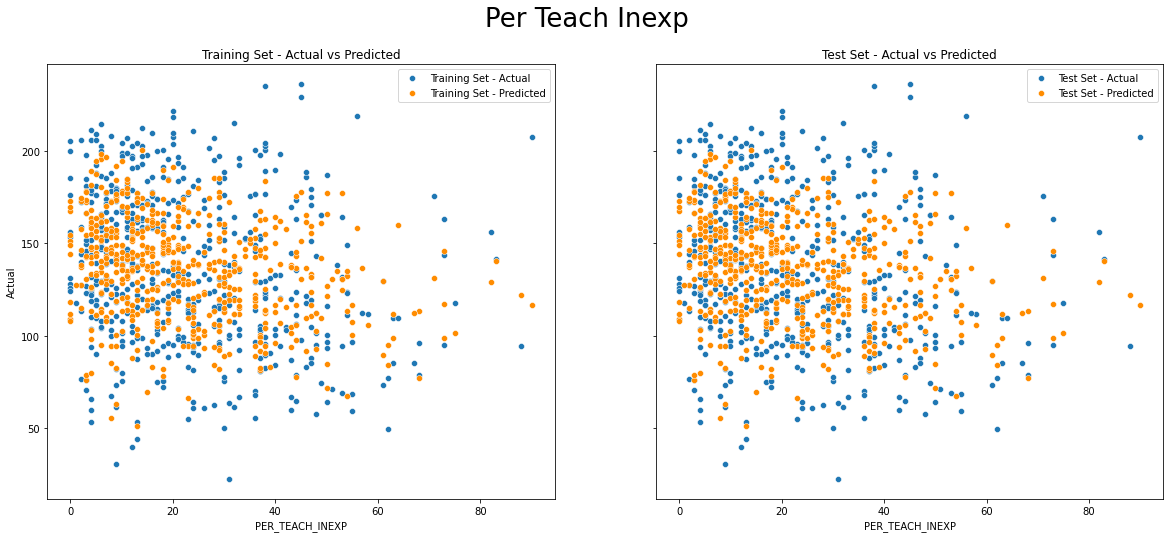

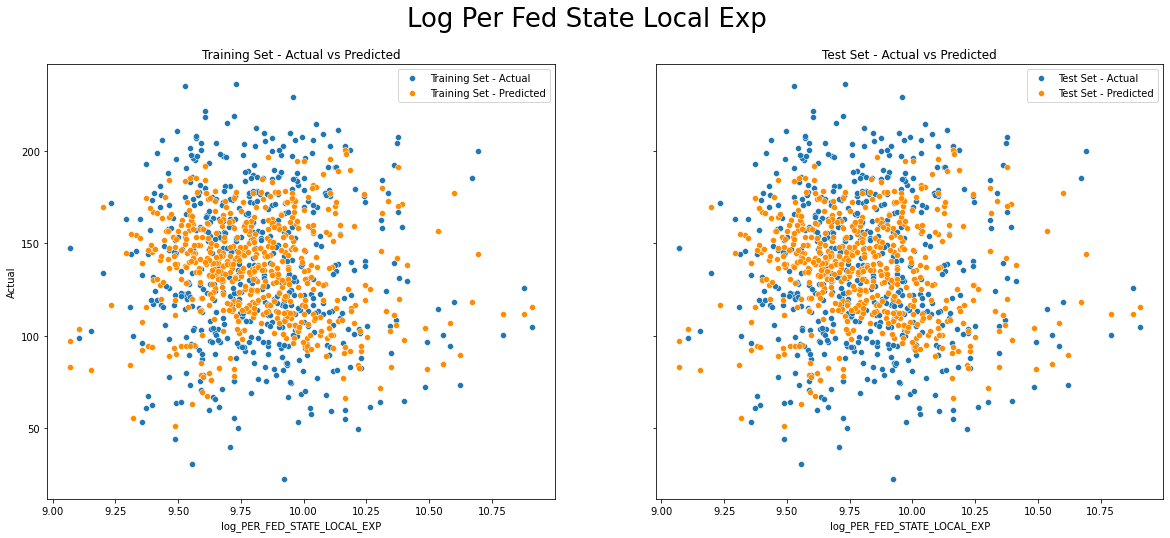

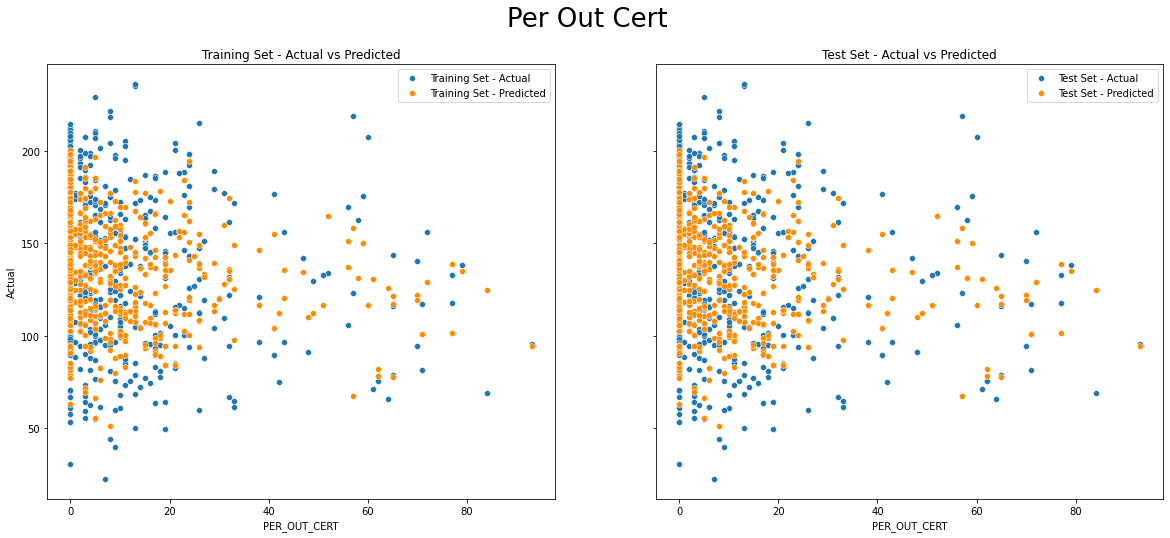

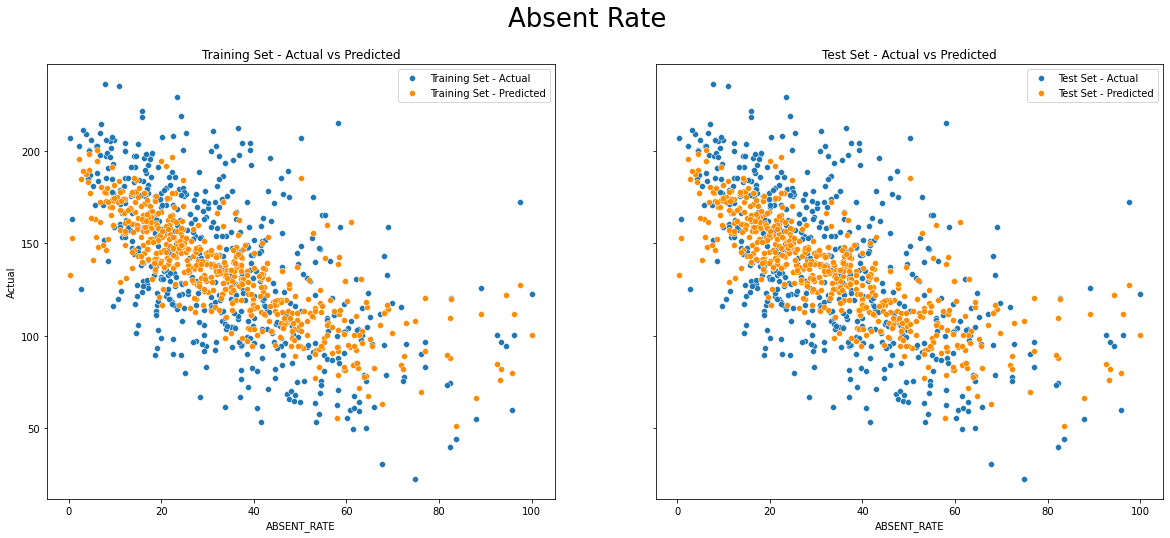

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def clean_label(label):
    return label.replace("_", " ").title()

# Assuming df_test is your test dataset
predictions_test = rf_model.predict(X_test_scaled)

# Create a DataFrame with actual and predicted values for the test set
scatter_df_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions_test,
    'log_PER_FED_STATE_LOCAL_EXP': df_test['log_PER_FED_STATE_LOCAL_EXP'],
    'PER_TEACH_INEXP': df_test['PER_TEACH_INEXP'],
    'PER_OUT_CERT': df_test['PER_OUT_CERT'],
    'CORE_INDEX': df_test['CORE_INDEX'], 
    'ABSENT_RATE': df_test['ABSENT_RATE']
})

# Compare predictions on the training set and the test set
for feature in features:
    figure, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
    figure.suptitle(clean_label(feature), fontsize=26)

    # Scatter plot for training set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Training Set - Actual', ax=axes[0])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Training Set - Predicted', ax=axes[0], color="darkorange")

    # Scatter plot for test set actual and predicted data points
    sns.scatterplot(data=scatter_df_test, x=feature, y='Actual', label='Test Set - Actual', ax=axes[1])
    sns.scatterplot(data=scatter_df_test, x=feature, y='Predicted', label='Test Set - Predicted', ax=axes[1], color="darkorange")

    axes[0].set_title("Training Set - Actual vs Predicted")
    axes[1].set_title("Test Set - Actual vs Predicted")

    plt.show()


In [73]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=25, weights="uniform")
knn.fit(X=X_train_scaled, 
           y=y_train)

KNeighborsRegressor(n_neighbors=25)

Linear Model:
MSE: 982.4431701470572
R-squared: 0.3815194390765989

Polynomial Model:
MSE: 939.494179150774
R-squared: 0.4085572534251879

Random Forest Model:
MSE: 927.5926686978614
R-squared: 0.4160496490002432

KNN Model:
MSE: 850.2324944056938
R-squared: 0.46475044457113623



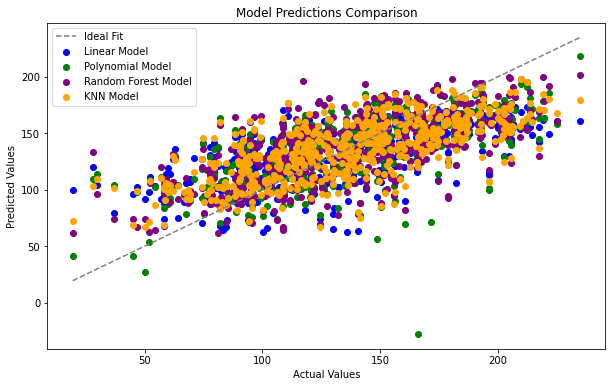

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Assuming you have rf_predictions from a Random Forest model
rf_predictions = rf_model.predict(X_val_scaled)
linear_predictions = linreg.predict(X_val_scaled)
poly_predictions = polyreg.predict(X_val_scaled)
knn_predictions = knn.predict(X_val_scaled)  # Adding KNN predictions

linear_mse = mean_squared_error(y_val, linear_predictions)
linear_r2 = r2_score(y_val, linear_predictions)

poly_mse = mean_squared_error(y_val, poly_predictions)
poly_r2 = r2_score(y_val, poly_predictions)

rf_mse = mean_squared_error(y_val, rf_predictions)
rf_r2 = r2_score(y_val, rf_predictions)

knn_mse = mean_squared_error(y_val, knn_predictions)
knn_r2 = r2_score(y_val, knn_predictions)

print("Linear Model:")
print(f"MSE: {linear_mse}")
print(f"R-squared: {linear_r2}")
print()

print("Polynomial Model:")
print(f"MSE: {poly_mse}")
print(f"R-squared: {poly_r2}")
print()

print("Random Forest Model:")
print(f"MSE: {rf_mse}")
print(f"R-squared: {rf_r2}")
print()

print("KNN Model:")
print(f"MSE: {knn_mse}")
print(f"R-squared: {knn_r2}")
print()

plt.figure(figsize=(10, 6))

plt.scatter(y_val, linear_predictions, label='Linear Model', color='blue')
plt.scatter(y_val, poly_predictions, label='Polynomial Model', color='green')
plt.scatter(y_val, rf_predictions, label='Random Forest Model', color='purple')
plt.scatter(y_val, knn_predictions, label='KNN Model', color='orange')  # Adding KNN to the plot

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='gray', label='Ideal Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions Comparison')
plt.legend()
plt.show()


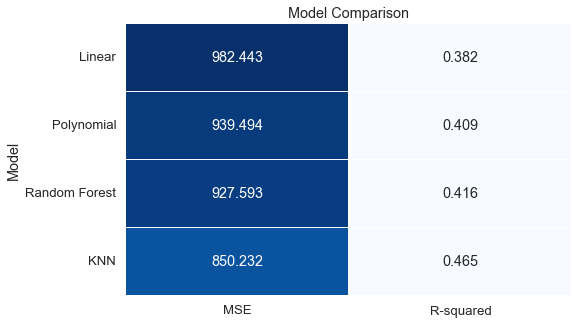

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the metrics calculated as described in your question
linear_mse = 982.4431701470572
linear_r2 = 0.3815194390765989

poly_mse = 939.494179150774
poly_r2 = 0.4085572534251879

rf_mse = 927.5926686978614
rf_r2 = 0.4160496490002432

knn_mse = 850.2324944056938
knn_r2 = 0.46475044457113623

# Create a DataFrame
data = {
    'Model': ['Linear', 'Polynomial', 'Random Forest', 'KNN'],
    'MSE': [linear_mse, poly_mse, rf_mse, knn_mse],
    'R-squared': [linear_r2, poly_r2, rf_r2, knn_r2]
}

df = pd.DataFrame(data)

# Plot the table using seaborn
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(df.set_index('Model'), annot=True, fmt=".3f", cmap="Blues", linewidths=.3, cbar=False)
plt.title('Model Comparison')
plt.show()


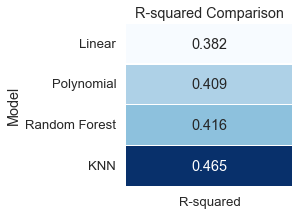

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have the metrics calculated as described in your question
linear_mse = 982.4431701470572
linear_r2 = 0.3815194390765989

poly_mse = 939.494179150774
poly_r2 = 0.4085572534251879

rf_mse = 927.5926686978614
rf_r2 = 0.4160496490002432

knn_mse = 850.2324944056938
knn_r2 = 0.46475044457113623

# Create a DataFrame
data = {
    'Model': ['Linear', 'Polynomial', 'Random Forest', 'KNN'],
    'R-squared': [linear_r2, poly_r2, rf_r2, knn_r2]
}

df = pd.DataFrame(data)

# Plot the table using seaborn
plt.figure(figsize=(3, 3))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(df.set_index('Model'), annot=True, fmt=".3f", cmap="Blues", linewidths=.3, cbar=False)
plt.title('R-squared Comparison')
plt.show()
